## Columnの説明

### BureauのColumn

* SK_ID_CURR

ID of loan in Home Credit Group's sample
* SK_ID_BUREAU

Recorded ID of credit bureau credit
* CREDIT_ACTIVE

Status of the credit bureau reported credits
* CREDIT_CURRENCY

Recorded currency
* DAYS_CREDIT

How many days before current application did client apply for Credit Bureau credit
* CREDIT_DAY_OVERDUE

Number of days past due on CB credit at the time of application to the Home Credit 
* DAYS_CREDIT_ENDDATE

Remaining duration of CB credit at the time of application in Home Credit
* DAYS_ENDDATE_FACT

Days since CB credit ended at the time of application in Home Credit
* AMT_CREDIT_MAX_OVERDUE

Maximum amount of overdue
* CNT_CREDIT_PROLONG

* AMT_CREDIT_SUM

* AMT_CREDIT_SUM_DEBT

* AMT_CREDIT_SUM_LIMIT

* AMT_CREDIT_SUM_OVERDUE

* CREDIT_TYPE

* DAYS_CREDIT_UPDATE

* AMT_ANNUITY

### Bureau BalanceのColumn

* SK_ID_BUREAU
* MONTH_BALANCE
* STATUS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
pd.set_option('display.max_colwidth', -1)

In [2]:
br_path = "../data/bureau.csv"
bb_path = "../data/bureau_balance.csv"

br = pd.read_csv(br_path)
bb = pd.read_csv(bb_path)

br.shape, bb.shape

((1716428, 17), (27299925, 3))

In [3]:
bb.head(50)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [56]:
sample = br[br["SK_ID_BUREAU"] == 5715451]
sample

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
770,380361,5715451,Closed,currency 1,-917,0,-187.0,-759.0,NaN,0,74439.0,0.0,0.0,0.0,Consumer credit,-748,0.0


In [57]:
 sample["DAYS_CREDIT_ENDDATE"] - sample["DAYS_CREDIT"]

770    730.0
dtype: float64

## Annuityとは？



月々の返済額らしい  
ホントか？

97


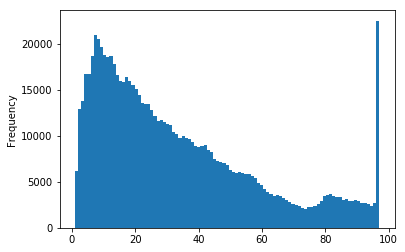

In [53]:
%matplotlib inline
counts = bb.groupby("SK_ID_BUREAU")["SK_ID_BUREAU"].value_counts()
fig = counts.plot(kind="hist", bins=97)
plt.savefig("../figure/bureau_balance_histogram.png")
print(counts.max())

In [81]:
overdue = br[br["CREDIT_DAY_OVERDUE"] > 0]
id_bureau = overdue["SK_ID_BUREAU"].reset_index(drop=True)

bb[bb["SK_ID_BUREAU"] == id_bureau[28]]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS


In [97]:
id_bad_debt = overdue[overdue.CREDIT_ACTIVE == 'Bad debt']["SK_ID_BUREAU"].reset_index(drop=True)
bb[bb.SK_ID_BUREAU == id_bad_debt[3]]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
16144030,5499851,0,X
16144031,5499851,-1,X
16144032,5499851,-2,X
16144033,5499851,-3,X
16144034,5499851,-4,X
16144035,5499851,-5,X
16144036,5499851,-6,X
16144037,5499851,-7,X
16144038,5499851,-8,X
16144039,5499851,-9,X


In [98]:
br[br.SK_ID_BUREAU == id_bad_debt[3]]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
711352,186360,5499851,Bad debt,currency 1,-1218,366,-852.0,NaN,NaN,0,121275.0,0.0,NaN,0.0,Consumer credit,-1035,NaN


## How many bureau credits do people have

(64,)


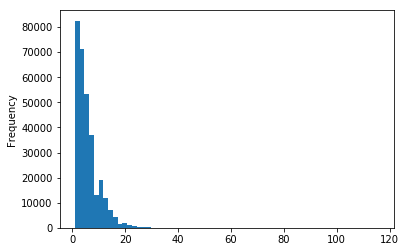

In [103]:
%matplotlib inline
num_bureau_per_person = br.groupby("SK_ID_CURR")["SK_ID_CURR"].value_counts()
num_bureau_per_person.plot(kind="hist", bins=64)
print(num_bureau_per_person.unique().shape)

In [111]:
id_many_bureau = num_bureau_per_person[num_bureau_per_person == 116]
id_many_bureau

SK_ID_CURR  SK_ID_CURR
120860      120860        116
Name: SK_ID_CURR, dtype: int64

In [119]:
num_bureau_per_person.value_counts()

1      41520
2      41004
3      37828
4      33467
5      28913
6      24329
7      20095
8      16736
9      13073
10     10518
11      8456
12      6564
13      5144
14      4129
15      3061
16      2394
17      1969
18      1513
19      1133
20       886
21       682
22       545
23       381
24       304
25       217
26       200
27       142
28       135
29        88
32        60
       ...  
36        22
38        19
35        18
37        13
41        10
40        10
39         9
47         8
45         5
44         4
55         4
42         3
49         3
50         3
43         3
54         3
48         2
51         2
58         1
78         1
61         1
60         1
59         1
53         1
57         1
56         1
52         1
94         1
46         1
116        1
Name: SK_ID_CURR, Length: 64, dtype: int64

## 最新月がCじゃない人

In [162]:
st_c_now = bb.query('MONTHS_BALANCE == 0 & STATUS == "C"')['SK_ID_BUREAU']
st_x_now = bb.query('MONTHS_BALANCE == 0 & STATUS == "X"')['SK_ID_BUREAU']
st_0_now = bb.query('MONTHS_BALANCE == 0 & STATUS == "0"')['SK_ID_BUREAU']
st_1_now = bb.query('MONTHS_BALANCE == 0 & STATUS == "1"')['SK_ID_BUREAU']
st_2_now = bb.query('MONTHS_BALANCE == 0 & STATUS == "2"')['SK_ID_BUREAU']
st_3_now = bb.query('MONTHS_BALANCE == 0 & STATUS == "3"')['SK_ID_BUREAU']
st_4_now = bb.query('MONTHS_BALANCE == 0 & STATUS == "4"')['SK_ID_BUREAU']
st_5_now = bb.query('MONTHS_BALANCE == 0 & STATUS == "5"')['SK_ID_BUREAU']

In [38]:
balance_st_c_now = bb[bb.SK_ID_BUREAU.isin(st_c_now)]
sample_id = st_c_now.sample(n=100).reset_index(drop=True)

0     5429051
1     5971618
2     6661171
3     6206137
4     6588449
5     5878580
6     5960778
7     5680601
8     5811740
9     6216489
10    6074086
11    6526493
12    5897443
13    6621072
14    6436778
15    6369967
16    6833155
17    5268144
18    5091768
19    5867607
20    5963872
21    6832794
22    5854116
23    6112860
24    5317686
25    6635249
26    6792443
27    6424047
28    6842855
29    6586486
       ...   
70    6241520
71    5999000
72    5628495
73    6031526
74    5960121
75    6431715
76    5816674
77    6653907
78    5843385
79    5943239
80    5808271
81    6168599
82    6095673
83    5959310
84    6280469
85    5992879
86    6664763
87    5808084
88    5609814
89    5928421
90    5680446
91    6437766
92    5934601
93    6036274
94    6433393
95    6088454
96    6056769
97    5760996
98    6793774
99    5169262
Name: SK_ID_BUREAU, Length: 100, dtype: int64

### 最新月が"C"でもClosedじゃない例もある

In [18]:
br[br.SK_ID_BUREAU.isin(st_c_now)].groupby("CREDIT_ACTIVE")["CREDIT_ACTIVE"].value_counts()

CREDIT_ACTIVE  CREDIT_ACTIVE
Active         Active            43480
Closed         Closed           283362
Sold           Sold                471
Name: CREDIT_ACTIVE, dtype: int64

In [19]:
br.groupby("CREDIT_ACTIVE")["CREDIT_ACTIVE"].value_counts()

CREDIT_ACTIVE  CREDIT_ACTIVE
Active         Active            630607
Bad debt       Bad debt              21
Closed         Closed           1079273
Sold           Sold                6527
Name: CREDIT_ACTIVE, dtype: int64

### 最新月がCの人を見ていく

一度Cになってから他のSTATUSになることはあるのか？ => 多分ない！

bureau.csvでActiveでもbureau_balanceでCならClosedにしていい？

In [16]:
id_1 = bb[bb.SK_ID_BUREAU == sample_id[0]] # MONTHS_BALANCE == -77からCが始まる
id_1.query('MONTHS_BALANCE > -78 & STATUS != "C"').count() # id 6571118はCになってから戻ってない

SK_ID_BUREAU      False
MONTHS_BALANCE    False
STATUS            False
dtype: bool

In [71]:
id_ = bb[bb.SK_ID_BUREAU == sample_id[29]]
id_

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
8114122,6586486,0,C
8114123,6586486,-1,C
8114124,6586486,-2,C
8114125,6586486,-3,C
8114126,6586486,-4,C
8114127,6586486,-5,C
8114128,6586486,-6,0
8114129,6586486,-7,0
8114130,6586486,-8,0
8114131,6586486,-9,0


In [70]:
br[br.SK_ID_BUREAU == sample_id[29]].CREDIT_ACTIVE

464899    Active
Name: CREDIT_ACTIVE, dtype: object

### 最新月がXの人

In [74]:
sample_id_x = st_x_now.sample(n=100).reset_index(drop=True)

In [158]:
idx = 36
id_x_ = bb[bb.SK_ID_BUREAU == sample_id_x[idx]]
id_x_

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
12958248,6279131,0,X
12958249,6279131,-1,0
12958250,6279131,-2,0
12958251,6279131,-3,0
12958252,6279131,-4,0
12958253,6279131,-5,0
12958254,6279131,-6,X
12958255,6279131,-7,0
12958256,6279131,-8,X
12958257,6279131,-9,X


In [159]:
br[br.SK_ID_BUREAU == sample_id_x[idx]]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
873717,151464,6279131,Active,currency 1,-1838,0,344.0,NaN,NaN,0,391500.0,382243.5,0.0,0.0,Credit card,-26,NaN


パターンとしては

* 全部X: Closedなことが多い
* 0や他の数字が混じってる: Activeなことが多い
* 全体としてConsumer Creditが多い？ => そんなことない
* いまいちわからん

In [160]:
br.groupby("CREDIT_TYPE")["CREDIT_TYPE"].value_counts()

CREDIT_TYPE                                   CREDIT_TYPE                                 
Another type of loan                          Another type of loan                            1017   
Car loan                                      Car loan                                        27690  
Cash loan (non-earmarked)                     Cash loan (non-earmarked)                       56     
Consumer credit                               Consumer credit                                 1251615
Credit card                                   Credit card                                     402195 
Interbank credit                              Interbank credit                                1      
Loan for business development                 Loan for business development                   1975   
Loan for purchase of shares (margin lending)  Loan for purchase of shares (margin lending)    4      
Loan for the purchase of equipment            Loan for the purchase of equipment             

In [161]:
br[br.SK_ID_BUREAU.isin(st_x_now)].groupby("CREDIT_TYPE")["CREDIT_TYPE"].value_counts()

CREDIT_TYPE                             CREDIT_TYPE                           
Another type of loan                    Another type of loan                      33   
Car loan                                Car loan                                  1140 
Cash loan (non-earmarked)               Cash loan (non-earmarked)                 12   
Consumer credit                         Consumer credit                           75768
Credit card                             Credit card                               47047
Loan for business development           Loan for business development             43   
Loan for working capital replenishment  Loan for working capital replenishment    28   
Microloan                               Microloan                                 1152 
Mortgage                                Mortgage                                  1808 
Real estate loan                        Real estate loan                          3    
Unknown type of loan                    U

### 最新月が0の人

In [164]:
sample_id_0 = st_0_now.sample(n=100).reset_index(drop=True)

In [188]:
idx = 10
id_0_ = bb[bb.SK_ID_BUREAU == sample_id_0[idx]]
id_0_

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
10784644,5970226,0,0
10784645,5970226,-1,0
10784646,5970226,-2,0
10784647,5970226,-3,0
10784648,5970226,-4,0
10784649,5970226,-5,X


In [189]:
br[br.SK_ID_BUREAU == sample_id_0[idx]]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
413151,329542,5970226,Active,currency 1,-170,0,1291.0,NaN,NaN,0,855000.0,793957.5,0.0,0.0,Consumer credit,-12,0.0


In [175]:
br[br.SK_ID_BUREAU.isin(st_0_now)].groupby("CREDIT_ACTIVE")["CREDIT_ACTIVE"].value_counts()

CREDIT_ACTIVE  CREDIT_ACTIVE
Active         Active           109463
Closed         Closed           18273 
Sold           Sold             193   
Name: CREDIT_ACTIVE, dtype: int64

## bureau.csvの方
### 各特徴の分布は？

In [24]:
br.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

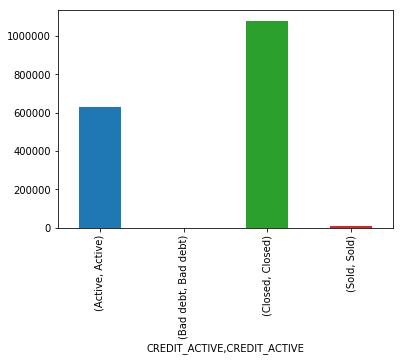

In [28]:
%matplotlib inline
br.groupby("CREDIT_ACTIVE")["CREDIT_ACTIVE"].value_counts().plot(kind="bar")
plt.savefig("../figure/CREDIT_ACTIVE_HISTOGRAM.png")

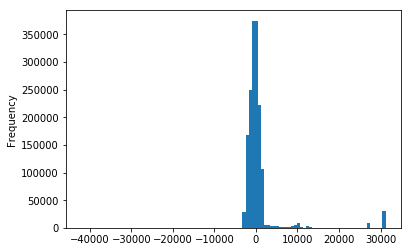

In [30]:
%matplotlib inline
br["DAYS_CREDIT_ENDDATE"].plot(kind="hist", bins=100)